# Navigating the New Normal: exploring a database snapshot of books, publishers, authors, and reader experiences in the Post-Pandemic world.

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were at home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers. 

I've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

**List of databases:**

- `books`
- `authors`
- `publishers`
- `ratings`
- `reviews`

**Task (mandatory research questions)**

- Find the number of books released after January 1, 2000.
- Find the number of user reviews and the average rating for each book.
- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).
- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
- Find the average number of text reviews among users who rated more than 50 books.

In [1]:
#!pip install psycopg2

In [2]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sqlalchemy import create_engine


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [4]:
# function designed to accept a query and deliver a dataframe in return

def request(q):
    return pd.io.sql.read_sql(query, con = engine)

# Inspection and Exploration of data

Ok. let's examining what we have

Our first dataframe is named **`books`.**

In [5]:
# make the query
query = '''
SELECT *
FROM books;
'''

# get response and take a little bit statistics
books = request(query)
books.info()
print()
books.describe(include = 'all').T
print()
books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
book_id,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
author_id,1000.0,NaN,NaN,NaN,320.417,181.620172,1.0,162.75,316.5,481.0,636.0
title,1000,999,Memoirs of a Geisha,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_pages,1000.0,NaN,NaN,NaN,389.111,229.39014,14.0,249.0,352.0,453.0,2690.0
publication_date,1000,618,2004-06-01,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher_id,1000.0,NaN,NaN,NaN,171.27,99.082685,1.0,83.0,177.5,258.0,340.0


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Interesting observation. We have a total of 1000 book titles, and surprisingly, 999 of them are unique. Is that a duplication? Let's investigate.

In [6]:
# make the query
query = '''
SELECT *
FROM books
WHERE title = 'Memoirs of a Geisha';
'''
# get response
request(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,426,39,Memoirs of a Geisha,434,2005-11-15,241
1,427,39,Memoirs of a Geisha,503,2005-11-22,311


Phew... it was a close call, but it passed. The books are the same, but with different publishers and publication dates.

Now, let's explore the number of unique authors and publishers in our database. Simultaneously, we'll examine the timeframe during which these books were published.

In [7]:
# make the query
query = '''
SELECT COUNT(DISTINCT(publisher_id)) as number_of_unique_publishers
FROM books
;
'''
# get response
request(query)

,number_of_unique_publishers
0,340


Ok, given that each publisher is unique, I'm curious about the distribution of their book assortments in our store. I'd like to understand how evenly the books are distributed across different publishers in our product range.

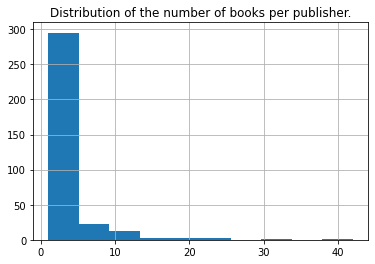

In [8]:
# make the query
query = '''
SELECT publisher_id, COUNT(book_id) as number_of_books
FROM books
GROUP BY publisher_id
ORDER BY number_of_books DESC;
'''
# get response
publisher_books_number = request(query)

# make the chart to show this
publisher_books_number.number_of_books.hist(bins = 10)
plt.title('Distribution of the number of books per publisher.');

Ok,  let's check the number of unique authors in the shop's product range.

In [9]:
# make the query 
query = '''
SELECT COUNT(DISTINCT(author_id)) as number_of_unique_authors
FROM books
;
'''
# get response
request(query)

,number_of_unique_authors
0,636


Similar to our examination of publishers, let's now explore the diversity in our product range based on authors.

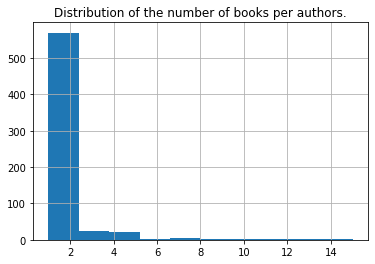

In [10]:
# make the query
query = '''
SELECT author_id, COUNT(book_id) as number_of_books
FROM books
GROUP BY author_id
ORDER BY number_of_books DESC;
'''
# get response
author_books_number = request(query)

# make the chart to show this
author_books_number.number_of_books.hist(bins = 10)
plt.title('Distribution of the number of books per authors.');

Ok. Now,  let's take a look at the years of publication represented in the shop's product range.

In [11]:
# make the query on date range of publish books
query = '''
SELECT MAX(EXTRACT(YEAR FROM CAST(publication_date AS DATE))) AS max_year,
    MIN(EXTRACT(YEAR FROM CAST(publication_date AS DATE))) AS min_year
FROM books
;
'''
# get response
print('\033[1m' + 'Extremes of the publication years of books.' + '\033[0m')
request(query)

Extremes of the publication years of books.


,max_year,min_year
0,2020.0,1952.0


Hmm... broadly, 68 years.\
Let's examine the distribution of the number of books based on their respective publication years.

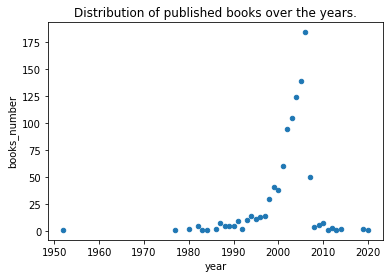

In [12]:
# make the query on number of published books per year    
query = '''
SELECT EXTRACT(YEAR FROM CAST(publication_date AS DATE)) AS year,
    COUNT(book_id) as books_number
FROM books
GROUP BY year
ORDER BY books_number DESC
;
'''
# get response
publish_book = request(query)
publish_book.plot.scatter(x='year', y='books_number')
plt.title('Distribution of published books over the years.');

Ok. To sum up - we have a ledger table with the following fields:

- `book_id`: book ID (Primary Key)
- `author_id`: author ID (Foreign Key)
- `title`: book title
- `num_pages`: number of pages
- `publication_date`: publication date
- `publisher_id`: publisher ID (Foreign Key)

In our dataset, there are records for 1000 books (with 999 unique titles, and Memoirs of a Geisha being the only book represented by 2 publishers). These books were written by 636 authors and published by 340 publishers.

On average, each writer has 1.5 published books. However, in practice, 75% of authors have only 1 book published, and the record holder, Terry Pratchett, boasts a total of 15 books.

The average number of published books for each publication is nearly 3. However, in practice, 50% of publishing houses are represented by only 1 book. The most widely represented publishing house, Penguin Books, has an impressive collection of 42 books.

The assortment spans from 1952 to 2020, covering 68 years, which gives it a substantial historical depth. Nevertheless, in practice, the books cover only 37 years of publication (almost 50%). After 1952 (Tennessee Williams' "Dramatists Play Service"), there is a significant gap that extends almost to the 1980s. Throughout almost the entire period, the number of books fluctuates within the range of up to 25 books. However, during the period from 1998 to 2007, there is a notable surge, reaching a peak of 184 books in 2006.

Now, let's delve into the **`authors`** table.

In [13]:
# make the query on dataset 'authors' fields    
query = '''
SELECT *
FROM authors;
'''
# display the statistics
authors = request(query)
authors.info()
print()
authors.describe(include = 'all').T
print()
authors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
author_id,636.0,NaN,NaN,NaN,318.5,183.741666,1.0,159.75,318.5,477.25,636.0
author,636,636,Stephen King/Peter Straub,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [14]:
# make the query to get the table with author name and number of books at the store.

query = '''
SELECT a.author, COUNT(b.book_id) as number_of_books
FROM authors as a
INNER JOIN books as b
ON a.author_id = b.author_id
GROUP BY a.author
ORDER BY number_of_books DESC
;
'''

# display only authors which have highest 5 values 'number of the books' 
author_info = request(query)
print('\033[1m' + 'Authors,  ranked by the top 5 largest by books which were published.' + '\033[0m')
author_info.nlargest(n=5, columns = 'number_of_books', keep = 'all')

Authors,  ranked by the top 5 largest by books which were published.


,author,number_of_books
0,Terry Pratchett,15
1,Laurell K. Hamilton,14
2,John Grisham,14
3,Stephen King,13
4,James Patterson,12
5,Dean Koontz,12


The **authors** table encompasses the following fields:

- `author_id`: a unique identifier for the author. (Primary Key)
- `author`: the name of the author.

Our dataset comprises 636 rows and two columns. The records are comprehensive, devoid of any missing data or duplicates. Regrettably, they lack more intricate details.\
Nevertheless, they can still impart valuable insights. We've curated a list of preeminent writers boasting the highest volume of literary works in the store. Among them, five are Americans, while one hails from England. Their predominant genres include science fiction, horror, thrillers, and detective stories.

Now, let's transition to the discussion of publishing houses.

In [15]:
# make the query on dataset 'publishers' fields    
query = '''
SELECT *
FROM publishers;
'''
# display the statistics
publishers = request(query)
publishers.info()
print()
publishers.describe(include = 'all').T
print()
publishers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
publisher_id,340.0,NaN,NaN,NaN,170.5,98.293777,1.0,85.75,170.5,255.25,340.0
publisher,340,340,W. W. Norton Company,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [16]:
# make the query to get the table with publisher and number of books at the store.
query = '''
SELECT p.publisher,
    COUNT(b.book_id) as number_of_books
FROM publishers as p
INNER JOIN books as b
ON p.publisher_id = b.publisher_id
GROUP BY p.publisher
ORDER BY number_of_books DESC
;
'''

# display only publishers which have highest 5 values 'number of the books'
publisher_info = request(query)
print('\033[1m' + 'Publishers,  ranked by the top 5 largest by books which they published.' + '\033[0m')
publisher_info.nlargest(n=5, columns = 'number_of_books', keep = 'all')

Publishers,  ranked by the top 5 largest by books which they published.


,publisher,number_of_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19


The **publishers** table includes the following fields:

- `publisher_id`: publisher identification number. (Primary Key)
- `publisher`: publisher name.

The dataset contains 340 rows and 2 columns, with no missing data or duplicates.\
A study of the leaders with the 5 highest numbers of books in our store’s assortment revealed the following:
- the leaders include 3 publishers from the USA and 3 from the UK.
- 5 of them belong to the publishing house ***Penguin Random House*** (leader emerged as a result of the merger between the British publisher Penguin and the American publisher Random House), and one is owned by ***Hachette Books Group*** (the upstarts rank first in France and are the third largest publishing house in the world in trade and education).


Now let's move on to the **`ratings`**.

In [17]:
# make the query on dataset 'ratings' fields  
query = '''
SELECT *
FROM ratings;
'''
# display the statistics
ratings = request(query)
ratings.info()
print()
ratings.describe(include = 'all').T
print()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rating_id,6456.0,NaN,NaN,NaN,3228.5,1863.831001,1.0,1614.75,3228.5,4842.25,6456.0
book_id,6456.0,NaN,NaN,NaN,510.574195,284.141636,1.0,291.0,506.0,750.0,1000.0
username,6456,160,martinadam,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,6456.0,NaN,NaN,NaN,3.928284,0.943303,1.0,3.0,4.0,5.0,5.0


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


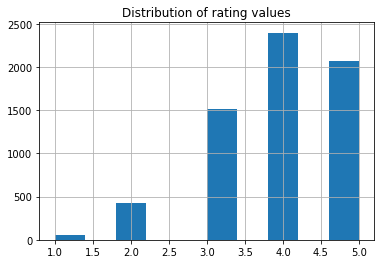

In [18]:
#display the distribution of rating values
ratings.rating.hist()
plt.title('Distribution of rating values');

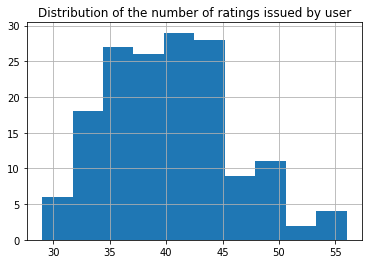

In [19]:
# display the distribution of the number of ratings issued by user
ratings.groupby('username')['rating_id'].count().hist()
plt.title('Distribution of the number of ratings issued by user');

In [20]:
# make the query to get the table with book titles, the number of marks and the average rating.
query = '''
SELECT b.title,
    COUNT(r.rating_id) as number_of_marks,
    AVG(r.rating) as avg_rating
FROM ratings as r
INNER JOIN books as b
ON b.book_id = r.book_id
GROUP BY b.title
ORDER BY number_of_marks DESC;
'''
# display only books which have highest 5 values 'number of the marks' 
books_ratings = request(query)
print('\033[1m' + 'Books are ranked by the top 5 largest number of marks.' + '\033[0m')
books_ratings.nlargest(n=5, columns = 'number_of_marks', keep = 'all')

Books are ranked by the top 5 largest number of marks.


,title,number_of_marks,avg_rating
0,Twilight (Twilight #1),160,3.662500
1,The Hobbit or There and Back Again,88,4.125000
2,The Catcher in the Rye,86,3.825581
3,Angels & Demons (Robert Langdon #1),84,3.678571
4,Harry Potter and the Prisoner of Azkaban (Harr...,82,4.414634


The **ratings** table comprises the following fields:

- `rating_id`: rating identifier (Primary Key).
-  `book_id`: book identifier (Foreign Key).
-  `username`: the name of the user who rated the book.
-  `rating`: rating value.

We observe that the rating values span from 1 to 5. Although there is no precise indication, it is reasonable to assume that 1 represents the lowest rating, while 5 signifies the highest.

We have a total of 6456 ratings from 160 users. On average, each user has rated approximately 40 books. But the overall number of ratings per user varies between 29 and 56.

Additionally, these ratings are distributed among 1000 books, resulting in an average of nearly 6.5 ratings per book. In practice, 75% of books have garnered between 1 and 5 ratings, with the leader, "Twilight (Twilight #1)," amassing 160 ratings.

Now, it's time to delve into the latest **`reviews`** table.

In [21]:
# make the query on dataset 'reviews' fields 
query = '''
SELECT *
FROM reviews;
'''

# display the statistics
reviews = request(query)
reviews.info()
print()
reviews.describe(include = 'all').T
print()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
review_id,2793.0,NaN,NaN,NaN,1397.0,806.413976,1.0,699.0,1397.0,2095.0,2793.0
book_id,2793.0,NaN,NaN,NaN,504.693161,288.472931,1.0,259.0,505.0,753.0,1000.0
username,2793,160,susan85,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,2793,2793,Look worker director instead back.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [22]:
# make the query to determine an length of reviews
query = '''
SELECT LENGTH(text) AS text_length
FROM reviews;
'''

# display the statistics
text_length = request(query)
text_length.describe().T

,count,mean,std,min,25%,50%,75%,max
text_length,2793.0,91.481561,33.656986,13.0,69.0,90.0,114.0,196.0


In [23]:
# make the query for check if the 160 users in this dataset are the same users as those in the 'ratings' dataset
query = '''
SELECT COUNT(DISTINCT r.username) AS common_usernames_number
FROM ratings as r
INNER JOIN reviews as t
ON r.username = t.username
;
'''
request(query)

,common_usernames_number
0,160


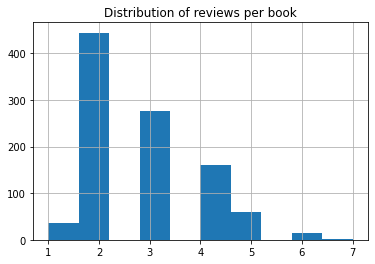

In [24]:
# display the distribution of the number of reviews written for book
reviews.groupby('book_id')['review_id'].count().hist()
plt.title('Distribution of reviews per book');

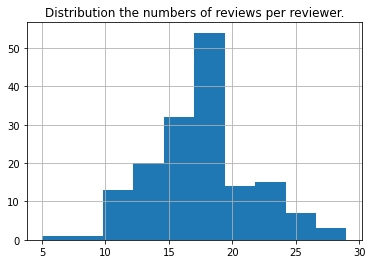

In [25]:
# display the distribution of the number of reviews per reviewer
reviews.groupby('username')['review_id'].count().hist()
plt.title('Distribution the numbers of reviews per reviewer.');

In [26]:
# make the query to determine the total number of reviews received by each author across all their published books
query = '''
SELECT a.author, COUNT(r.review_id) as number_reviews
FROM reviews as r
INNER JOIN books as b
ON r.book_id = b.book_id
INNER JOIN author as a
ON b.author_id = a.author_id
GROUP BY a.author
ORDER BY number_reviews DESC
;
'''

# display the authors who have the five largest numbers of reviews
author_reviews = request(query)
print('\033[1m' + 'Top 5 authors by number of reviews.' + '\033[0m')
author_reviews.nlargest(n = 5, columns = 'number_reviews', keep = 'all')

Top 5 authors by number of reviews.


,author,number_reviews
0,Stephen King,40
1,John Grisham,38
2,Terry Pratchett,36
3,Nicholas Sparks,35
4,Jodi Picoult,34


So, the **reviews** table has the following fields:

- `review_id`: review identifier (Primary Key).
- `book_id`: book identifier (Foreign Key).
- `username`: username of the reviewer.
- `text`: review text.

In this dataset, we have 2793 rows and 4 columns, with no missing data or duplicates.

In total, we have reviews for 994 books (not 1000). With 2793 reviews, this gives us an average of approximately 2.81 reviews per book.\
In reality, 75% of the books have a review count ranging from 1 to 3. In the last quartile, the review count can go up to 7 per book.

Meanwhile, the size of the reviews ranges from 13 to 196 characters, with an average size of 92 characters (including spaces).

The reviews were written by the same 160 users who also provided ratings. On average, each of them wrote around 17 reviews, with a minimum of 5 and a maximum of 29.

The most prolific reviewers of their works turned out to be American authors, and somehow an Englishman sneaked in there as well.

Now let's look at which book received the most reviews using a more comprehensive assessment.

The main indicator for us will be the number of reviews. Writing a review is a creative process, and not all users want to do it. In addition, the book should inspire you to write a review. This combination of factors is a rather rare phenomenon, so we consider it the main indicator.

In second place is the average length of a review (including spaces). The desire to leave a more detailed review, of course, depends on the user’s personal skills, but the desire to express one’s thoughts in more detail also matters. It also depends on the book.

In third place is the number of ratings issued. While I will of course also provide an average rating, I will focus on the number of ratings given. User rating is a subjective assessment, but it is important to us that as many people as possible show interest in the book. Therefore, the more ratings, the more interest in the book.

In [27]:
# make the query  retrieve the title, reviews number, average length reviews, number of rating and average rating for each book
query = '''
SELECT b.title,
    COUNT(DISTINCT r.review_id) as number_reviews,
    AVG(r.text_length) as avg_text_length,
    COUNT(DISTINCT t.rating_id) as number_of_marks,
    AVG(t.rating) as avg_rating
FROM books as b
LEFT JOIN (
    SELECT book_id,
        review_id,
        LENGTH(text) AS text_length
    FROM reviews
) as r
ON b.book_id = r.book_id
LEFT JOIN (
    SELECT book_id,
        rating_id,
        rating
    FROM ratings
) as t
ON b.book_id = t.book_id
GROUP BY b.title
ORDER BY number_reviews DESC, avg_text_length DESC, number_of_marks DESC;
'''

# display the TOP 5 highest-rated books
books_review = request(query)
print('\033[1m' + 'Top 5 books based on the number of reviews, average length of review and the number of marks.' + '\033[0m')
books_review.head()

Top 5 books based on the number of reviews, average length of review and the number of marks.


,title,number_reviews,avg_text_length,number_of_marks,avg_rating
0,Memoirs of a Geisha,8,76.069231,56,4.138462
1,Twilight (Twilight #1),7,89.571429,160,3.662500
2,Eat Pray Love,6,120.500000,48,3.395833
3,The Alchemist,6,120.333333,57,3.789474
4,The Lightning Thief (Percy Jackson and the Oly...,6,109.500000,62,4.080645


Interesting. The book 'Memoirs of a Geisha' takes the first place, and as we recall, we have two versions from different publishers. Let's examine the characteristics of each.

In [28]:
# make the query to to generate a table similar to the one above,
# but specifically for the book 'Memoirs of a Geisha', and separate the results for each publisher
query = '''
SELECT b.title,
    p.publisher,
    COUNT(DISTINCT r.review_id) as number_reviews,
    AVG(r.text_length) as avg_text_length,
    COUNT(DISTINCT t.rating_id) as number_of_marks,
    AVG(t.rating) as avg_rating
FROM books as b
LEFT JOIN (
    SELECT book_id,
        review_id,
        LENGTH(text) AS text_length
    FROM reviews
) as r
ON b.book_id = r.book_id
LEFT JOIN (
    SELECT book_id,
        rating_id,
        rating
    FROM ratings
) as t
ON b.book_id = t.book_id
LEFT JOIN publishers as p
ON b.publisher_id = p.publisher_id
WHERE b.title = 'Memoirs of a Geisha'
GROUP BY b.title, p.publisher
ORDER BY number_reviews DESC, avg_text_length DESC, number_of_marks DESC;
'''

#display the result
print('\033[1m' + 'Comparison of the results of the book "Memoirs of a Geisha" published by different publishers.' + '\033[0m')
request(query)

Comparison of the results of the book "Memoirs of a Geisha" published by different publishers.


,title,publisher,number_reviews,avg_text_length,number_of_marks,avg_rating
0,Memoirs of a Geisha,Random House Large Print Publishing,5,71.600000,46,4.195652
1,Memoirs of a Geisha,Vintage Books USA,3,110.333333,10,3.700000


Interesting. If the number of reviews differs by almost twice, the number of ratings given is 4.6... - that's quite substantial. [Additional Explorations](#test_hypoteses)

<a id="explorations_conclusion"></a>
**Intermediate conclusion**

Upon initial inspection, everything seems quite promising. We have obtained five datasets containing information on 1000 books, authored by 636 writers, and published by 340 different publishers. Out of the 1000 books, 999 are unique, with only "Memoirs of a Geisha" being represented by two publishers.

An intriguing aspect lies in the distribution of published books over the years. While 1952 appears to be an outlier, the sharp increase from 1997 to 2008 catches the eye. If we consider the hypothesis that these are only physical books, I have a suspect emerges — digitalization. This period aligns with the rapid development of the internet and technology, leading to the emergence of e-books. Publishers, possibly caught off guard, faced stockpiling issuesб because they didn’t appreciate the new way of consumption. Notably, significant mergers and acquisitions occurred just during this period among publisher houses.

Another noteworthy observation is the dominance of American authors and publishers, with a limited presence from British authors and publishers. These observations are based on the study of only the top 5 leaders, and although not conclusive, it suggests a focus on the U.S. market.

Additionally, we have data on 6456 rating scores and 2793 reviews written by a mere 160 users. It's worth noting their generosity in ratings, with an average rating of around 4 out of 5, accompanied by concise reviews averaging 4-6 sentences (92 characters including spaces).

Our small-scale investigation uncovered one book among the 1000 that was published by different publishers, with the distinct approaches these publishers take in book formatting. *Random House Large Print Publishing* specializes in large-format books with quality paper, often chosen for leisurely reading, while *Vintage Books USA* focuses on portable paperback editions.

I employed *Fisher's exact test* to investigate whether book formatting has an impact on the likelihood of receiving reviews. However, the limited sample size currently prevents me from confidently asserting any such influence.

Additionally, the utilization of a *Permutation test* did not provide evidence to reject the hypothesis that the book format affects the average rating of books.

In conclusion, questions arise regarding the dataset quality:

- With 999 unique titles out of 1000, is this an extensive assortment curation or a non-random sample?
- The absence of users who rated but didn't review, and vice versa, raises eyebrows. In my experience, many are willing to assign a rating but not everyone is inclined to write a review.

**I harbor significant doubts about the 'truthfulness' of these datasets and would hesitate to advise drawing further conclusions without additional exploration into how this data was obtained.**

# Tasks part

***1. Find the number of books released after January 1, 2000.***

In [29]:
# 
query = '''
SELECT COUNT(book_id) as number_of_book
FROM books
WHERE publication_date > '2000-01-01'
;
'''
request(query)

,number_of_book
0,819


So, we can see that almost 82% of the assortment consists of books released in 2000 and later. Considering that books are constantly reissued and presented in different formats, this figure, although expected, is intriguing.\
It's unlikely to give us a complete understanding of readers' preferences, but it raises the question: where did the old books come from in the assortment (for example, from 1952), especially if the assortment is clearly not from a second-hand bookstore.

Given that the data was provided by 'one of the services,' I assume it might have been some kind of marketplace like eBay or Amazon.

***2. Find the number of user reviews and the average rating for each book.***

In [30]:
query = '''
SELECT b.title,
    p.publisher, -- use publisher for separate data of book 'Memoirs of a Geisha'
    COUNT(DISTINCT r.review_id) as number_reviews,
    AVG(t.rating) as avg_rating
FROM books as b
LEFT JOIN (
    SELECT book_id,
        review_id,
        LENGTH(text) AS text_length
    FROM reviews
) as r
ON b.book_id = r.book_id
LEFT JOIN (
    SELECT book_id,
        rating_id,
        rating
    FROM ratings
) as t
ON b.book_id = t.book_id
LEFT JOIN publishers as p
ON b.publisher_id = p.publisher_id
GROUP BY b.title, p.publisher
ORDER BY number_reviews DESC, avg_rating DESC
;
'''

#display the result
print('\033[1m' + 'The number of user reviews and the average rating for each book.' + '\033[0m')
request(query)

The number of user reviews and the average rating for each book.


,title,publisher,number_reviews,avg_rating
0,Twilight (Twilight #1),Little Brown and Company,7,3.662500
1,Harry Potter and the Prisoner of Azkaban (Harr...,Scholastic Inc.,6,4.414634
2,Harry Potter and the Chamber of Secrets (Harry...,Arthur A. Levine Books / Scholastic Inc.,6,4.287500
3,The Book Thief,Alfred A. Knopf,6,4.264151
4,The Glass Castle,Scribner,6,4.206897
...,...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden...,Golden/Disney,0,4.000000
996,Leonardo's Notebooks,Black Dog & Leventhal,0,4.000000
997,Essential Tales and Poems,Barnes Noble Classics,0,4.000000
998,Anne Rice's The Vampire Lestat: A Graphic Novel,Ballantine Books,0,3.666667


We obtained similar data previously during the "Inspection and Exploration of data" stage, and they didn't provide any new insights. We display ratings and leaders, but they don't give an understanding of what to focus on.\
We are dealing with the assortment without seeing sales, hence not understanding the actual interest of buyers. I don't see much value in this table.

***3. Identify the publisher that has released the greatest number of books with more than 50 pages\
(this will help you exclude brochures and similar publications from your analysis).***

In [31]:
query = '''
SELECT p.publisher,
    COUNT(DISTINCT b.book_id) as number_of_books
FROM books as b
LEFT JOIN publishers as p
ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY number_of_books DESC
LIMIT 1
;
'''

#display the result
print('\033[1m' + 'The publisher that has released the greatest number of books with more than 50 pages.' + '\033[0m')
request(query)

The publisher that has released the greatest number of books with more than 50 pages.


,publisher,number_of_books
0,Penguin Books,42


We have obtained the necessary data, but they won't tell us much.\
What do we want to find out at this stage? Which publishing house is most widely represented in our assortment? And why is it the most represented? Is there no interest in these books?\
We won't find out without sales data.

Moreover, this figure shows only one subdivision. The same **Penguin Books** is part of **Penguin Random House**, which includes many other publishers. It would be much more interesting to enrich the data on manufacturers, such as what products they offer. Are these exclusive editions, or pocket-sized books? What genres are most important to them?

***4. Identify the author with the highest average book rating (look only at books with at least 50 ratings).***

In [32]:
query = '''
SELECT a.author,
    ROUND(AVG(r.rating), 2) as avg_rating
FROM books as b
LEFT JOIN authors as a
ON a.author_id = b.author_id
LEFT JOIN ratings as r
ON r.book_id = b.book_id
GROUP BY a.author
HAVING COUNT(rating_id) > 50
ORDER BY avg_rating DESC
;
'''
request(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29
1,Agatha Christie,4.28
2,Markus Zusak/Cao Xuân Việt Khương,4.26
3,J.R.R. Tolkien,4.24
4,Roald Dahl/Quentin Blake,4.21
5,Louisa May Alcott,4.20
6,Rick Riordan,4.13
7,Arthur Golden,4.11
8,Stephen King,4.01
9,John Grisham,3.97


A fascinating metric, although it's unclear why the cutoff point is set at 50 ratings. Essentially, we are compiling a list of authors who have received ratings from approximately more than a third (50/160) of the customers. However, only 22 authors have crossed this threshold, representing just about one in seven (22/160).

The surprising finding is that, despite the dominance of American authors in other ratings, British authors emerge as leaders here (14), followed by Americans (9), with one Australian author (1). This doesn't necessarily imply that British authors excel in skill while Americans focus on quantity in the overall picture, but it's an intriguing observation.

***6. Find the average number of text reviews among users who rated more than 50 books.***

In [37]:
query = '''
WITH rating_50 as (
SELECT username,
    COUNT(rating_id) as ratings_number
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50
    )


SELECT COUNT(review_id)/COUNT(DISTINCT(username)) as avg_reviews_number,
    COUNT(DISTINCT(username)) as number_of_users
FROM reviews
WHERE username IN (
    SELECT username
    FROM rating_50
    )
;
'''
request(query)

,avg_reviews_number,number_of_users
0,24,6


So, 24 reviews, is that a lot or a little? Considering that the average number of reviews is 17, and 29 is the maximum, it's quite a significant number. This is also confirmed by the number of users who managed to do this - only 6 out of 160 (3.75%).\
Additionally, this indicates that on average, there are about 2 ratings given for each review.

# Conclusion

"Nothing is a photo, everything is a movie" (someone online).

I like this phrase. Looking at a photo, it's unlikely we can accurately predict what a person will be doing in some time. However, by closely examining the photo, studying the details, we can make assumptions about who they are. This is what we did today, delving into the 'snapshot' of our data, trying to draw an average profile.

We found that books are represented in various genres: science fiction, thriller, horror, crime thriller, etc. We have books for both adults and children (all books are up to 50 pages, but not limited to this volume).

We highlighted several leaders among books, authors, and publishers. Mostly, these turned out to be American authors and American publishers, indicating the region where the data was collected.

# Recommendation

So far, we've only taken the first step. To provide information for the value proposition of a new product, we need to:

1. Understand what this new product is.
2. Clarify the nature of our data. Filtered data can lead to distortions.
3. Add life to our snapshot by introducing dynamics, even if it's not sales but at least page visits.
4. Enrich the data with variables such as:
    - Book genre. Aggregating books by genres will facilitate the discovery of common user interests.
    - Book format. Besides the advent of digitization in our lives, audio books have gained popularity. Aggregating by this feature will also help identify trends and interests.

<a id="test_hypoteses"></a>

# Aditional test hypoteses.

Certainly, we lack information on the precise number of books sold by each publisher, which is a crucial factor. I have a hypothesis that this difference is also influenced by the fact that these are distinct publishers. *`Random House Large Print Publishing`* specializes in producing large-format books, known for their high quality, typically intended for leisurely reading at a desk.

Conversely, *`Vintage Books`* focuses on paperback editions, convenient for on-the-go reading and likely priced more affordably.

I don't know about you, but I naturally wonder: does the format of a book influence the desire to write a review? Undoubtedly, the content of a book is crucial, but it's also evident that perception can vary, much like the difference between drinking wine from a glass and from a plastic cup.

We have a ratio of the number of reviews to the number of ratings. Although the sample size is small, we can employ Fisher's test.

Now, let's formulate the hypotheses:\
H0: There is no difference in the proportion of received reviews (ratio of the number of reviews to the number of ratings) between the publishers.\
H1: There is a difference in the proportion of received reviews (ratio of the number of reviews to the number of ratings) between the publishers.\
alpha = 0.05

In [34]:
from scipy.stats import fisher_exact

# get the data
publisher1_reviews, publisher1_ratings = 5, 46
publisher2_reviews, publisher2_ratings = 3, 10

# create the contingency table
contingency_table = [[publisher1_reviews, publisher2_reviews],
                     [publisher1_ratings - publisher1_reviews, publisher2_ratings - publisher2_reviews]]

# apply the Fisher's test
odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')

# display the result
print(f'Odds Ratio: {odds_ratio}')
print(f'P-value: {p_value}')

# check the statistically significant
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference between the publishers: we reject the null hypothesis.')
else:
    print('No statistical significance: we do not reject the null hypothesis.')

Odds Ratio: 0.2845528455284553
P-value: 0.14277258073040539
No statistical significance: we do not reject the null hypothesis.


Ok.\
While our initial analysis did not reveal a statistically significant difference, let's now investigate whether the book format has any influence on the ratings.

Тhis way, we have unbalanced and small-sized groups, so I prefer a non-parametric approach using the permutation test.

In brief, I will start by measuring the difference between the average ratings of the two books.\
Then, I will take all rating data, shuffle them randomly, pick the first 46 values (the number of ratings for the first publisher's book), and calculate the average rating. From the remaining data, I will calculate the average rating for the second publisher's book. The obtained difference will be recorded, and this process will be repeated, let's say, 10,000 times.

The resulting set of 10,000 differences represents a random distribution modeled from the original dataset.

Next, we will determine the proportion of difference values obtained in the permutation test that exceed the observed difference. This proportion will be our p-value.

Thus, we formulate hypotheses:

H0 - there is no statistically significant difference between the average ratings of books with different formats.\
H1 - books with different formats have a statistically significant difference in the average rating.\
alpha = 0.05.

In [35]:
import numpy as np

# get the data
ratings_publisher1 = ratings.loc[ratings.book_id == 426]['rating']
ratings_publisher2 = ratings.loc[ratings.book_id == 427]['rating']

# let's concatanate the data
all_ratings = np.concatenate([ratings_publisher1, ratings_publisher2])

# get the baseline difference between the group
observed_diff = np.mean(ratings_publisher1) - np.mean(ratings_publisher2)

# setting permutation
num_permutations = 10000
permuted_diffs = np.zeros(num_permutations)

# make the loop for permutation
for i in range(num_permutations):
    np.random.shuffle(all_ratings)
    permuted_diffs[i] = np.mean(all_ratings[:46]) - np.mean(all_ratings[46:]) 
# we use 46, becouse the dataset consists of 46 entries, representing the ratings for book_id = 426. In this context, we are partitioning
# the dataset resulting from permutations into two groups, each with a size equivalent to the original dataset.

# p-value
p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()

# display the results
print(f'Observed difference: {observed_diff}')
print(f'P-value of permutation test: {p_value}')

# check the statistical significance
alpha = 0.05
if p_value < alpha:
    print('Average ratings differ between publishers: we reject the null hypothesis.')
else:
    print('No statistical significance: we do not reject the null hypothesis.')

Observed difference: 0.4956521739130437
P-value of permutation test: 0.1225
No statistical significance: we do not reject the null hypothesis.


At this juncture, we are unable to embrace the hypothesis that the design of books significantly impacts user ratings (or the inclination to write reviews, as we discovered earlier).

Nevertheless, againe, our dataset is insufficient for drawing precise conclusions.

[Back to project](#explorations_conclusion)